In [1]:
import pandas as pd
from seaborn import xkcd_palette
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [2]:
# Read the scaled data
data = pd.read_csv("D:\\Data analysis\\Data-Analysis-2024\\Project\\Data\\scaled_flood_drivers_dataset.csv")

# Define categories and their columns
categories = {
    "Labels": [col for col in data.columns if col.startswith('L')],
    "Topography": [col for col in data.columns if col.startswith('T')],
    "Hydrological": [col for col in data.columns if col.startswith('H')],
    "Vegetation": [col for col in data.columns if col.startswith('V')],
    "Shape": [col for col in data.columns if col.startswith('S')],
    "Climate": [col for col in data.columns if col.startswith('C')]
}



### Neural Network

In [3]:
# Separate rows where all labels are zero
test_df = data[data[categories["Labels"]].sum(axis=1) == 0]

# Separate rows where at least one label is non-zero
main_df = data[data[categories["Labels"]].sum(axis=1) != 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Preview the resulting DataFrames
print("Rows with all labels equal to zero (test_df):")
print(test_df.head())

print("\nRows with at least one non-zero label (main_df):")
print(main_df.head())


Rows with all labels equal to zero (test_df):
      L1   L2   L3   L4   L5   L6   L7   L8   L9  L10  ...        C2  \
352  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
353  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.004902   
354  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.049020   
355  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.009804   
357  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.053922   

           H2        H3        H4        H5        T5        H9       H10  \
352  0.818760  0.697173  1.000000  0.005022  0.006367  0.428588  0.813953   
353  0.871590  0.404917  0.846802  0.002372  0.007792  0.507090  0.651163   
354  0.849595  0.189909  0.816700  0.026568  0.186253  0.040286  0.837209   
355  0.802668  0.711472  0.707430  0.003682  0.038763  0.393546  0.767442   
357  0.632812  0.682185  0.511407  0.003637  0.018111  0.257110  0.767442   

          H11       H12  
352  0.307711  0.111479  
353  0

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Dynamically define feature columns
features_columns = [col for col in data.columns if col not in categories["Labels"] + ['tile_id', 'tile_name_', 'WSID']]

# Prepare your feature and label datasets
X = main_df[features_columns].values  # Feature columns from your data
y = main_df[categories["Labels"]].values  # Multi-label probabilities (categories["Labels"])

# Standardize the feature dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer for multi-label classification
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Sigmoid for multi-label probabilities

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Binary crossentropy for multi-label classification
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/100


D:\prediction flood drivers\Predicting-Flood-Drivers\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0550 - loss: 1.0355 - val_accuracy: 0.1395 - val_loss: 0.9038
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0969 - loss: 1.0086 - val_accuracy: 0.1279 - val_loss: 0.8834
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0950 - loss: 0.9742 - val_accuracy: 0.1279 - val_loss: 0.8642
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1003 - loss: 0.9521 - val_accuracy: 0.1279 - val_loss: 0.8461
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1013 - loss: 0.9348 - val_accuracy: 0.1279 - val_loss: 0.8294
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1049 - loss: 0.9009 - val_accuracy: 0.1279 - val_loss: 0.8137
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0958 - loss: 0.9122 - val_accuracy: 0.1279 - val_loss: 0.7987
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0891 - loss: 0.8609 - val_accuracy: 0.1279 - val_loss:

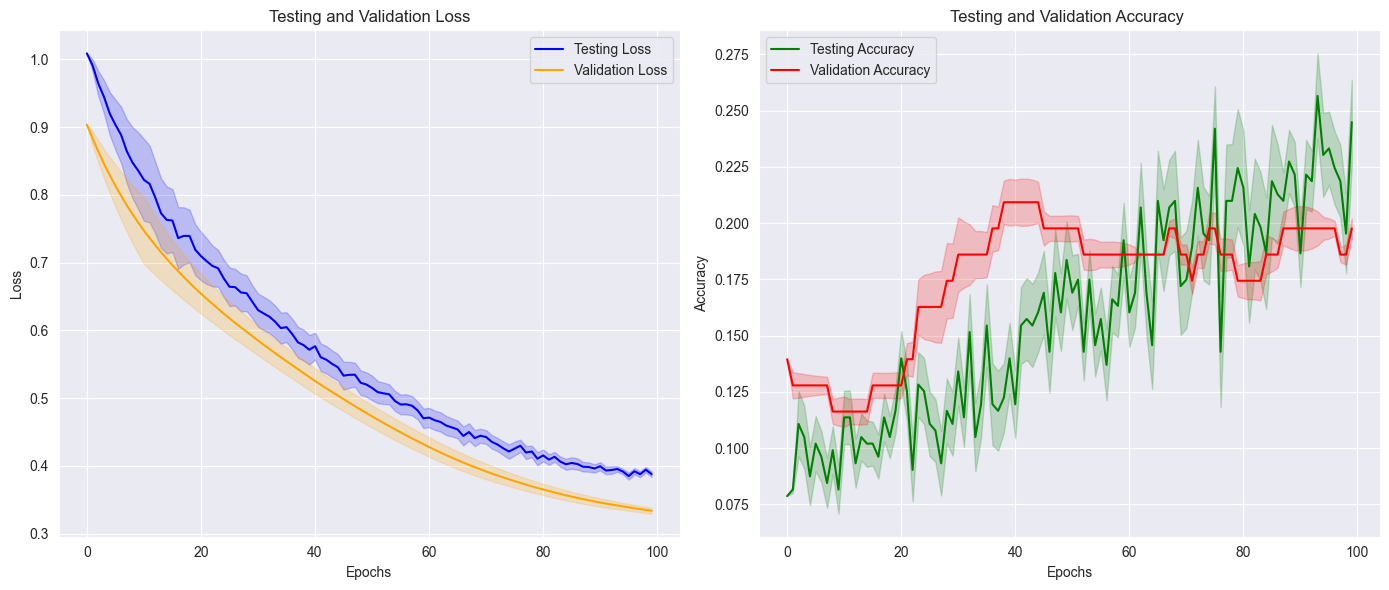

In [9]:

# Assuming you have a Keras 'history' object from training your model
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Convert lists into NumPy arrays for easier manipulation
loss = np.array(loss)
val_loss = np.array(val_loss)
accuracy = np.array(accuracy)
val_accuracy = np.array(val_accuracy)

# Define a window size for rolling calculations (you can adjust this value)
window_size = 10

# Calculate rolling standard deviation for each metric
rolling_std_loss = np.array([np.std(loss[max(0, i - window_size):i+1]) for i in range(len(loss))])
rolling_std_val_loss = np.array([np.std(val_loss[max(0, i - window_size):i+1]) for i in range(len(val_loss))])
rolling_std_accuracy = np.array([np.std(accuracy[max(0, i - window_size):i+1]) for i in range(len(accuracy))])
rolling_std_val_accuracy = np.array([np.std(val_accuracy[max(0, i - window_size):i+1]) for i in range(len(val_accuracy))])

# Plotting Loss vs. Epochs with Error Bars
plt.figure(figsize=(14, 6))

# Plot Loss with Error Bars
plt.subplot(1, 2, 1)
plt.plot(loss, label='Testing Loss', color='blue')
plt.fill_between(range(len(loss)), loss - rolling_std_loss, loss + rolling_std_loss, color='blue', alpha=0.2)
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.fill_between(range(len(val_loss)), val_loss - rolling_std_val_loss, val_loss + rolling_std_val_loss, color='orange', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing and Validation Loss')
plt.legend()

# Plot Accuracy with Error Bars
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Testing Accuracy', color='green')
plt.fill_between(range(len(accuracy)), accuracy - rolling_std_accuracy, accuracy + rolling_std_accuracy, color='green', alpha=0.2)
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.fill_between(range(len(val_accuracy)), val_accuracy - rolling_std_val_accuracy, val_accuracy + rolling_std_val_accuracy, color='red', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Testing and Validation Accuracy ')
plt.legend()

plt.tight_layout()
plt.show()
